# Portfolio Risk Estimation

Calculate the risk of a portfolio is no easy task, which includes the calculation of covariance matrix of the instruments. In this program, we attempt to combine both yfinance and riskfolio packages to calculate the risk of a equity portfolio

#### Riskfolio documentation
https://riskfolio-lib.readthedocs.io/en/latest/index.html

### Setup
Note: yfinance api is used here since it is widely used and free, and most importantly with datetime package we can roll the program daily and calculate the risk measures automatically

In [1]:
# import necessary packages

# import statistical packages
import numpy as np
import pandas as pd

# import api datasource
import yfinance as yf

# import date calculation package
from datetime import datetime, timedelta

# import riskfolio package
import riskfolio as rp

#warning exception handling
yf.pdr_override()

### Input
Here we can input any tickers as long as the ticker is available on Yahoo Finance

In [2]:
# Tickers of assets
tickers = ['DXCM', 'MPC', 'VRT', 'NVDA', 'CBRG', 'PGR', 'UNH', 'ANET', 'LW', 'DKNG', 'TSLA', 'CARR', 'LOW']
tickers.sort()

Risk measures are usually calculated over 1-year timeframe, though feel free to adjust if needed

In [3]:
# Date range
start = datetime.today() - timedelta(days=365)
end = datetime.today() - timedelta(days=1)

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()

[*********************100%***********************]  13 of 13 completed


Here we create a portfolio object specified in Riskfolio library with the data downloaded

In [4]:
Y = assets

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

There are many more risk measures available in Riskfolio, here for simplicity we used standard deviation

In [5]:
# Choose the risk measure
rm = 'MV'  # Standard Deviation

Again, there are many more models available in Riskfolio, here for simplicity we used historical method to calculate covariance

In [6]:
# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

Here we plug in all the parameters to Riskfolio calculation engine, and choose to optimise Sharpe ratio

Risk-free rate (rf) is 0 here, which could be unrealistic for institutional investors. For retail investors however, rf = 0 may be realistic since we may not have sizable assets to get the risk-free rate

In [7]:
# Estimate the portfolio that maximizes the risk adjusted return ratio
w = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0, l=0, hist=True)

Then Riskfolio will generate a summary of different risk measures and plots, which is useful to understand the returns, risk measures and most importantly, the optimised portfolio weightings for each stock in the portfolio composition.

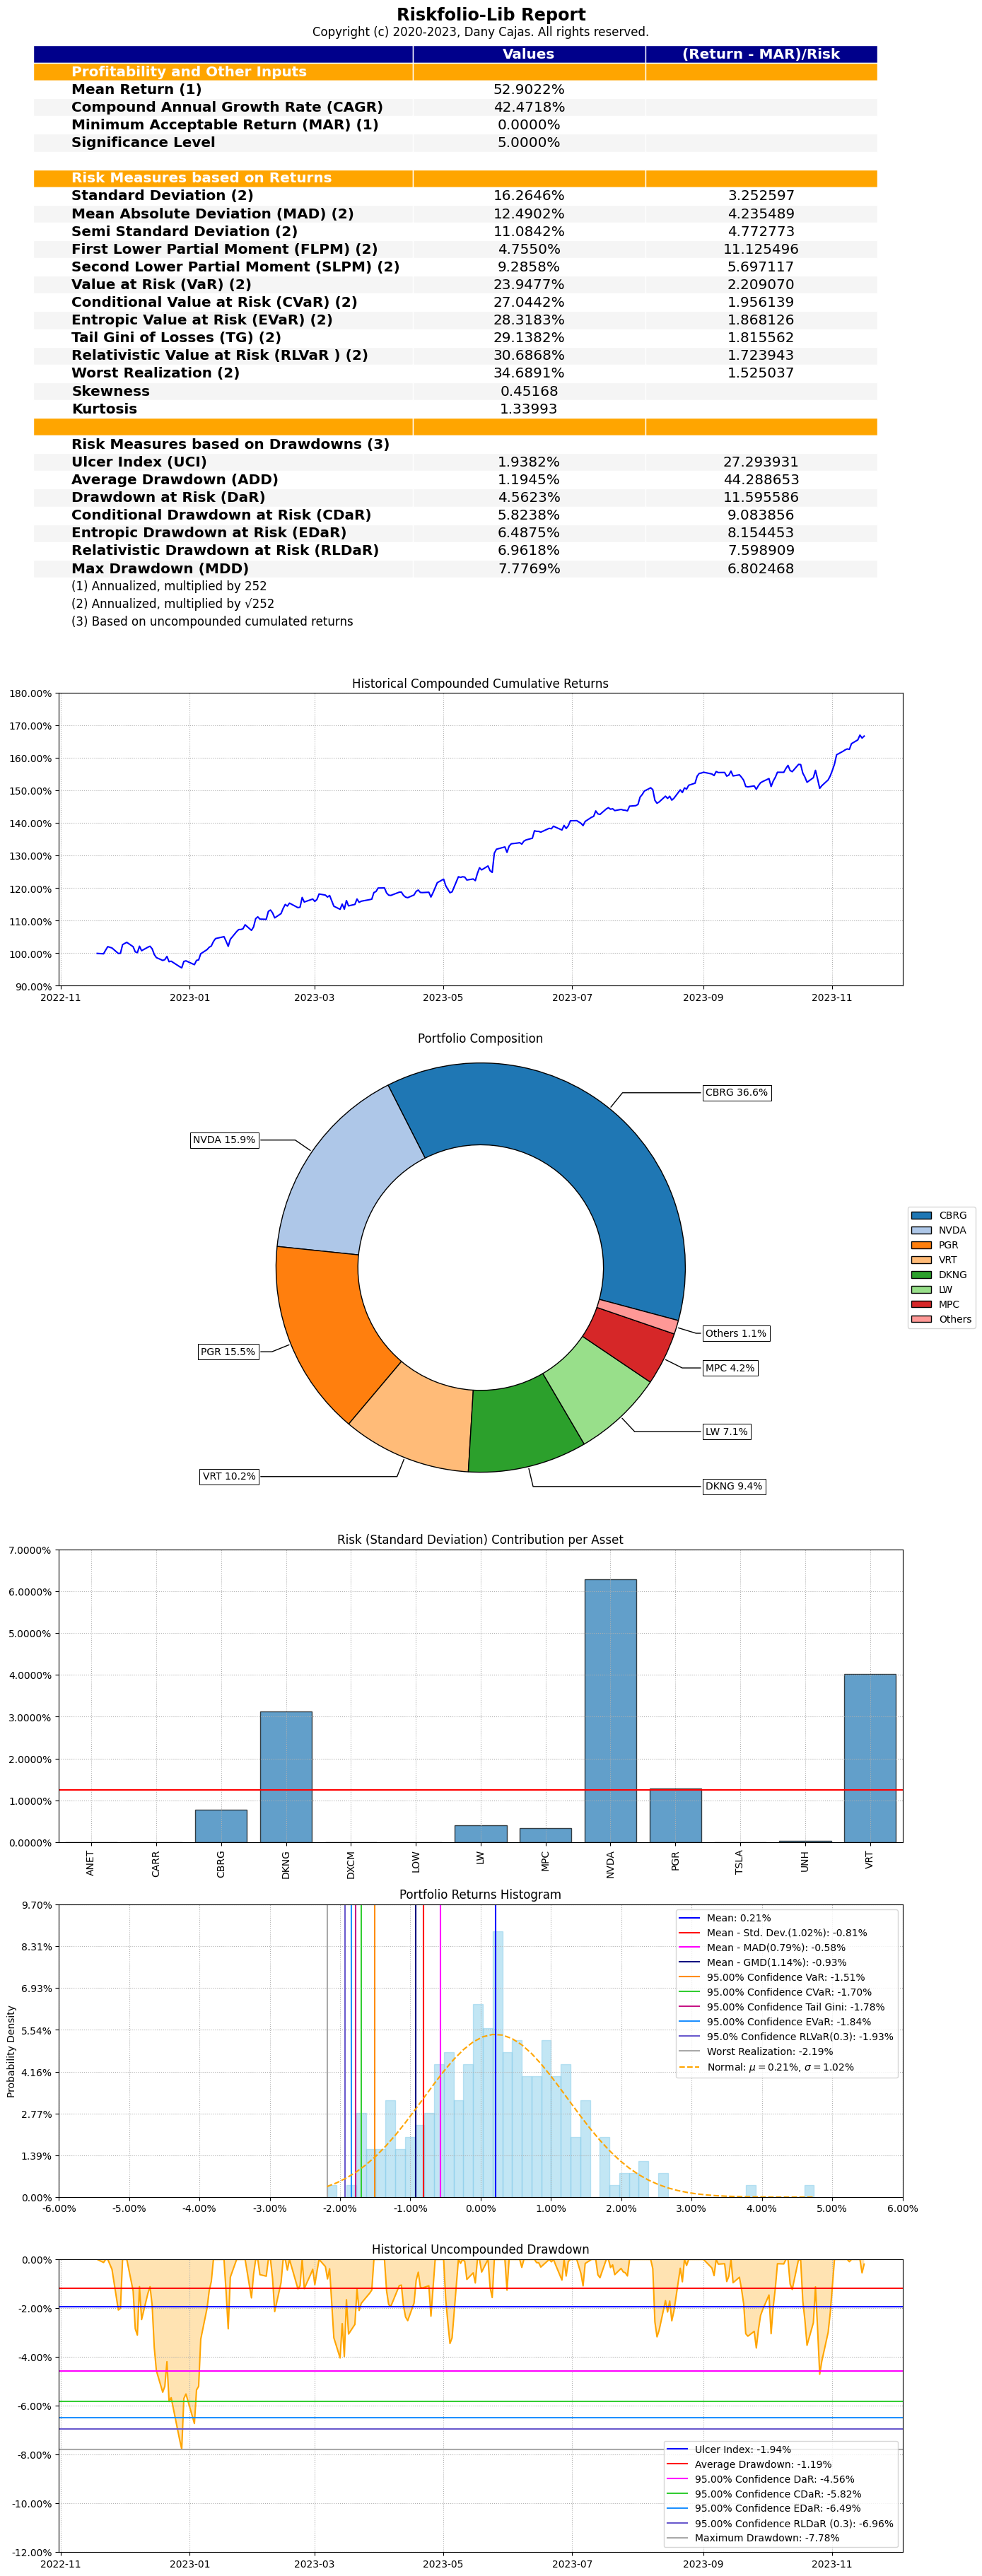

In [ ]:
ax = rp.jupyter_report(assets,
                       w,
                       rm='MV',
                       rf=0,
                       alpha=0.05,
                       height=6,
                       width=14,
                       others=0.05,
                       nrow=25)